<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

# 01-Preparing The Data For Analysis

Before beginning your analysis, it is critical that you first examine and clean the dataset, to make working with it a more efficient process. You will practice fixing data types, handling missing values, and dropping columns and rows while learning about the Stanford Open Policing Project dataset.

***

## Examining the dataset

You'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. You'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

**INSTRUCTIONS**

*   Import pandas using the alias ``pd``.
*   Read the file police.csv into a DataFrame named ``ri``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``"head"``).
*   Count the number of missing values in each column: Use ``.isnull()`` to check which ``DataFrame`` elements are missing, and then take the ``.sum()`` to count the number of ``True`` values in each column.

In [1]:
import pandas as pd
ri=pd.read_csv("police.csv")


C:\Users\honor\AppData\Local\Temp\ipykernel_15416\2448035100.py:2: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ri=pd.read_csv("police.csv")


In [2]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [3]:
ri.isnull().values.any()

True

In [4]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

***

## Dropping columns

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the ``DataFrame``, to make it easier for you to focus on the remaining columns.

You'll drop the ``county_name`` column because it only contains missing values, and you'll drop the ``state`` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

**INSTRUCTIONS**

*   Examine the ``DataFrame``'s shape to find out the number of rows and columns.

*   Drop the columns that almost consist of missing values. 

*   Examine the ``.shape`` again to verify that there are now two fewer columns.

In [5]:
ri.shape

(509681, 26)

In [6]:
ri.drop(["county_name","state"],axis=1, inplace=True)

In [7]:
ri.shape

(509681, 24)

***

## Dropping rows

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the ``driver_gender`` column will be critical to many of your analyses. Because only a small fraction of rows are missing ``driver_gender``, we'll drop those rows from the dataset.

**INSTRUCTIONS**

*   Count the number of missing values in each column.

*   Drop all rows that are missing ``driver_gender`` by passing the column name to the subset parameter of ``.dropna()``.
*   Count the number of missing values in each column again, to verify that none of the remaining rows are missing ``driver_gender``.
*   Examine the ``DataFrame``'s ``.shape`` to see how many rows and columns remain.

In [8]:
ri.isnull().sum()

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [9]:
ri.dropna(subset='driver_gender', inplace=True)

In [10]:
ri.isnull().sum()

id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department             0
driver_gender                 0
driver_age_raw                1
driver_age                 1638
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          462822
search_type              462822
contraband_found              0
stop_outcome                  0
is_arrested                   0
stop_duration                 0
out_of_state                808
drugs_related_stop            0
district                      0
dtype: int64

In [11]:
ri.shape

(480584, 24)

***

## Fixing a data type

We know that the ``is_arrested`` column currently has the ``object`` data type. In this exercise, we'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

**INSTRUCTIONS**

*   Examine the head of the ``is_arrested`` column to verify that it contains ``True`` and ``False`` values.
*   Check the current data type of ``is_arrested``.
*   Use the ``.astype()`` method to convert ``is_arrested`` to a ``bool`` column.
*   Check the new data type of ``is_arrested``, to confirm that it is now a ``bool`` column.

In [12]:
ri["is_arrested"].head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [13]:
ri["is_arrested"].dtype

dtype('O')

In [14]:
ri["is_arrested"]=ri["is_arrested"].astype(bool)

In [15]:
# column dtype değiştirme

# df = df.astype({'a':np.int32, 'b':np.float32})
# df['a'] = df['a'].astype(np.int32)        

In [16]:
ri.is_arrested.dtype

dtype('bool')

***

## Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: ``stop_date`` and ``stop_time``.

You'll combine these two columns into a single column, and then convert it to ``datetime`` format. This will enable convenient date-based attributes that we'll use later in the course.

**INSTRUCTIONS**

*    Use a string method to concatenate ``stop_date`` and ``stop_time`` (separated by a space), and store the result in ``combined``.
*    Convert ``combined`` to ``datetime`` format, and store the result in a new column named ``stop_datetime``.
*    Examine the ``DataFrame`` ``.dtypes`` to confirm that ``stop_datetime`` is a datetime column.

In [17]:
# iki sütunu aralarına boşluk koyarak yeni bir sütunda birleştirme

# ri["stop_datetime"]=ri["stop_date"]+" "+ri["stop_time"]         method 1
# ri.stop_date.str.cat(ri.stop_time, sep= ' ')                    method 2

In [18]:
combined = ri.stop_date.str.cat(ri.stop_time, sep= ' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                 object
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


The last step that you'll take in this chapter is to set the ``stop_datetime`` column as the ``DataFrame``'s index. By replacing the default index with a ``DatetimeIndex``, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course.

**INSTRUCTIONS**

*   Set ``stop_datetime`` as the ``DataFrame`` index.
*   Examine the index to verify that it is a ``DatetimeIndex``.
*   Examine the ``DataFrame`` columns to confirm that ``stop_datetime`` is no longer one of the columns.

In [19]:
ri.set_index("stop_datetime", inplace=True)            # bir sütunu index olarak dönüştürme

In [20]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [21]:
ri.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

# 02-exploring-the-relationship-between-gender-and-policing

Does the ``gender`` of a driver have an impact on police behavior during a traffic stop? **In this chapter**, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

***

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the ``violations`` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the ``violation`` column, and then separately express those counts as proportions.

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data.** Continue to this chapter based on where you were in the end of the previous chapter.

**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [22]:
ri["violation"].value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [23]:
ri["violation"].value_counts(normalize=True)

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64

***

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [24]:
ri["driver_gender"].value_counts

<bound method IndexOpsMixin.value_counts of stop_datetime
2005-01-02 01:55:00    M
2005-01-02 20:30:00    M
2005-01-04 12:55:00    M
2005-01-06 01:30:00    M
2005-01-12 08:05:00    M
                      ..
2015-12-31 22:46:00    M
2015-12-31 22:47:00    M
2015-12-31 23:08:00    M
2015-12-31 23:44:00    M
2015-12-31 23:48:00    M
Name: driver_gender, Length: 480584, dtype: object>

In [25]:
female = ri[ri["driver_gender"] == "F"]
male = ri[ri["driver_gender"] == "M"]

In [26]:
print(female["violation"].value_counts())
print(female["violation"].value_counts(normalize=True))

Speeding               86198
Moving violation       17911
Equipment              14039
Registration/plates     5649
Other                   3791
Seat belt               3550
Name: violation, dtype: int64
Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64


In [27]:
print(male["violation"].value_counts())
print(male["violation"].value_counts(normalize=True))

Speeding               182538
Moving violation        72317
Equipment               47211
Other                   20425
Registration/plates     14181
Seat belt               12774
Name: violation, dtype: int64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


***

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [28]:
female_and_speeding = female[female["violation"] == "Speeding"]
male_and_speeding = male[male["violation"] == "Speeding"]

In [29]:
print(female_and_speeding["stop_outcome"].value_counts())
print(female_and_speeding["stop_outcome"].value_counts(normalize=True))

Citation            82168
Warning              3362
Arrest Driver         456
Arrest Passenger       89
N/D                    78
No Action              45
Name: stop_outcome, dtype: int64
Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64


In [30]:
print(male_and_speeding["stop_outcome"].value_counts())
print(male_and_speeding["stop_outcome"].value_counts(normalize=True))

Citation            172432
Warning               6587
Arrest Driver         2878
Arrest Passenger       231
N/D                    216
No Action              194
Name: stop_outcome, dtype: int64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [31]:
ri.search_conducted.dtype

dtype('O')

In [32]:
ri.search_conducted = ri.search_conducted.astype("bool")

In [33]:
ri.search_conducted.dtype

dtype('bool')

In [34]:
print(ri.search_conducted.value_counts())
print(ri.search_conducted.value_counts(normalize=True))

False    462822
True      17762
Name: search_conducted, dtype: int64
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64


In [35]:
ri.search_conducted.mean()

0.036959199640437465

***

## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.6%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [36]:
ri[ri["driver_gender"]=="F"].search_conducted.mean()

0.018751239152648355

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [37]:
ri[ri["driver_gender"]=="M"].search_conducted.mean()

0.04379217389811301

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [38]:
ri.groupby(by="driver_gender").search_conducted.mean()

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

***

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [39]:
ri.groupby(["driver_gender", "violation"]).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [40]:
ri.groupby(["violation", "driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

***

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [41]:
ri.search_type.value_counts(dropna=False)

NaN                                                         462822
Incident to Arrest                                            6998
Probable Cause                                                4989
Reasonable Suspicion                                          1141
Inventory                                                     1101
Protective Frisk                                               879
Incident to Arrest,Inventory                                   649
Incident to Arrest,Probable Cause                              552
Probable Cause,Reasonable Suspicion                            334
Probable Cause,Protective Frisk                                221
Incident to Arrest,Protective Frisk                            158
Incident to Arrest,Inventory,Probable Cause                    151
Inventory,Probable Cause                                       132
Protective Frisk,Reasonable Suspicion                           83
Incident to Arrest,Inventory,Protective Frisk                 

In [42]:
ri["frisk"]=ri.search_type.str.contains("Protective Frisk", na=False)

In [43]:
ri.frisk.dtype

dtype('bool')

In [44]:
ri.frisk.sum()

1598

***

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [45]:
searched =ri[ri["search_conducted"] == True]

In [46]:
searched["frisk"].mean()

0.08996734601959239

In [47]:
searched.groupby(["driver_gender"]).frisk.mean()

driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64

# 03-visual-exploratory-data-analysis(Student)

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [48]:
ri.head(1)

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False


In [49]:
ri["is_arrested"].mean()

0.03454755048024903

In [50]:
ri.groupby(ri.index.hour).is_arrested.mean()   # year/mount/hour/day ile index içindeki zaman dilimlerine göre gruplandırma 

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [51]:
hourly_arrest_rate=ri.groupby(ri.index.hour).is_arrested.mean()

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

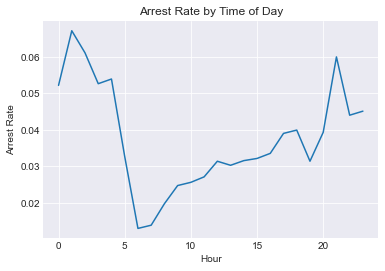

In [53]:
plt.style.use("seaborn-darkgrid")

hourly_arrest_rate.plot()

plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [54]:
annual_drug_rate=ri.drugs_related_stop.resample("A").mean()

In [55]:
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

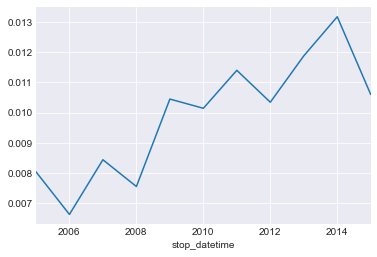

In [56]:
annual_drug_rate.plot()

plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [57]:
annual_search_rate=ri.search_conducted.resample("A").mean()

In [58]:
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [59]:
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

In [60]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


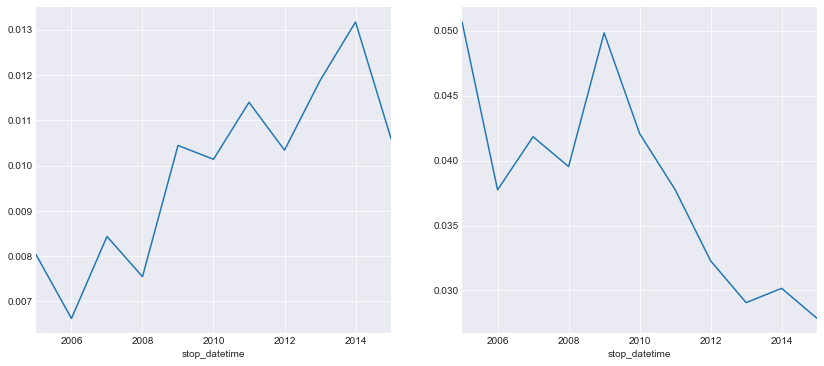

In [61]:
plt.figure(figsize = (14, 6))

plt.subplot(1 , 2, 1)
annual_drug_rate.plot()
plt.subplot(1, 2, 2)
annual_search_rate.plot()
plt.show()

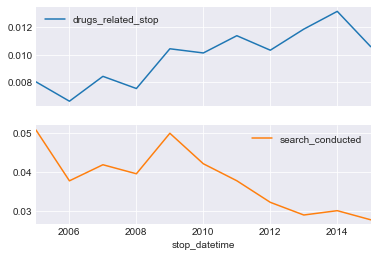

In [62]:
annual.plot(subplots=True);

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [63]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [64]:
all_zones=pd.crosstab(ri.district, ri.violation)

In [65]:
all_zones.loc['Zone K1':'Zone K3',...]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [66]:
k_zones=all_zones.loc['Zone K1':'Zone K3',...]

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

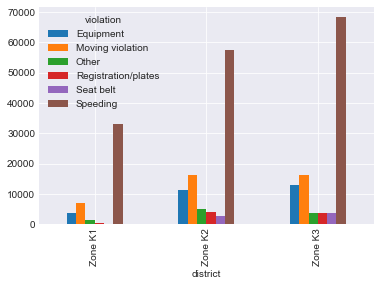

In [67]:
k_zones.plot(kind="bar");

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

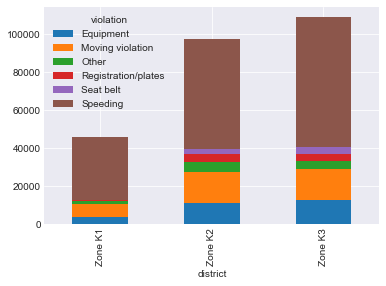

In [68]:
k_zones.plot(kind="bar", stacked=True);

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [69]:
ri.stop_duration.unique()             

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [70]:
mapping={'0-15 Min':8, '16-30 Min':23, '30+ Min':45, "1":1, "2":2}

In [71]:
ri["stop_minutes"]=ri.stop_duration.map(mapping)

In [72]:
ri["stop_minutes"].unique()         

array([ 8, 23, 45,  2,  1], dtype=int64)

***

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the **average length** of time drivers are stopped for each **type** of **violation**. Rather than using the ``violation`` column in this exercise, you'll use ``violation_raw`` since it contains more detailed descriptions of the violations.

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [73]:
stop_length=ri.groupby(["violation_raw"]).stop_minutes.mean()

In [74]:
stop_length

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454155
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.833943
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589143
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

<AxesSubplot:ylabel='violation_raw'>

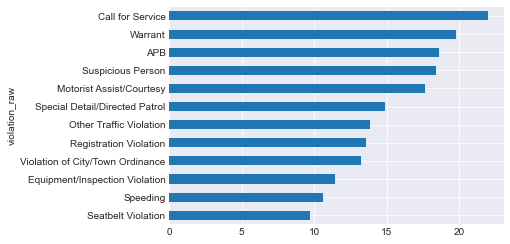

In [75]:
stop_length.sort_values().plot(kind="barh")

# 04-analyzing-the-effect-of-weather-on-policing(Student)

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

You'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First we'll print the summary statistics, and then you'll visualize the data using a box plot.

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [76]:
weather=pd.read_csv("weather.csv")

In [77]:
weather.head(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


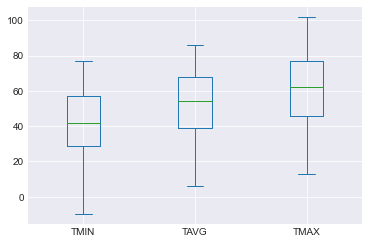

In [79]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind="box");

***

## Plotting the temperature difference

In this exercise, you'll continue to assess ``whether`` the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting **histogram**? Does it match your expectations, or do you see anything unusual?

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [80]:
weather["TDIFF"]=weather["TMAX"]-weather["TMIN"]

In [81]:
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

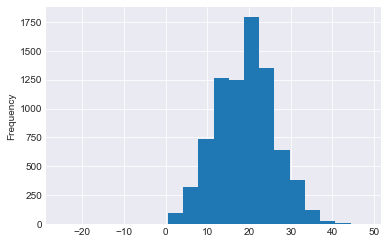

In [82]:
weather["TDIFF"].plot(kind="hist", bins=20);

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [83]:
weather.head(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0


In [84]:
WT=weather.loc[...,"WT01":"WT22"]

In [85]:
weather["bad_conditions"]=WT.sum(axis=1)

In [86]:
weather["bad_conditions"].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Name: bad_conditions, Length: 8022, dtype: float64

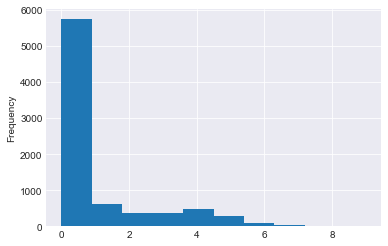

In [87]:
weather["bad_conditions"].plot(kind="hist");

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [88]:
weather.bad_conditions.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [89]:
mapping={0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}
weather["rating"]=weather.bad_conditions.map(mapping)

In [90]:
weather["rating"].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [91]:
from pandas.api.types import CategoricalDtype

In [92]:
cats=['good', 'bad', 'worse']

In [93]:
weather["rating"]=weather["rating"].astype(CategoricalDtype(ordered=True, categories=cats))

In [94]:
weather["rating"].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [95]:
ri.reset_index(inplace=True)

In [96]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,8
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,23
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False,45


In [97]:
weather_rating = weather[["DATE", "rating"]]

In [98]:
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [99]:
ri.shape

(480584, 27)

In [100]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [101]:
ri_weather.shape

(959952, 29)

In [102]:
ri_weather.drop_duplicates(subset = ['stop_datetime'], inplace = True, ignore_index = True)

In [103]:
ri_weather.shape

(424851, 29)

In [104]:
ri_weather.set_index("stop_datetime", inplace=True) 

In [105]:
ri_weather.head(1)

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,good


In [106]:
ri_weather.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district',
       'frisk', 'stop_minutes', 'DATE', 'rating'],
      dtype='object')

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [107]:
ri_weather.is_arrested.mean()

0.029640980014169673

In [108]:
ri_weather.groupby("rating").is_arrested.mean()

rating
good     0.029655
bad      0.030483
worse    0.016064
Name: is_arrested, dtype: float64

In [109]:
ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

violation            rating
Equipment            good      0.053720
                     bad       0.044304
                     worse     0.048780
Moving violation     good      0.049270
                     bad       0.071066
                     worse     0.024194
Other                good      0.072266
                     bad       0.212766
                     worse     0.032258
Registration/plates  good      0.073321
                     bad       0.018519
                     worse     0.000000
Seat belt            good      0.024556
                     bad       0.000000
                     worse          NaN
Speeding             good      0.010859
                     bad       0.006079
                     worse     0.006897
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [110]:
arrest_rate=ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

In [111]:
arrest_rate

violation            rating
Equipment            good      0.053720
                     bad       0.044304
                     worse     0.048780
Moving violation     good      0.049270
                     bad       0.071066
                     worse     0.024194
Other                good      0.072266
                     bad       0.212766
                     worse     0.032258
Registration/plates  good      0.073321
                     bad       0.018519
                     worse     0.000000
Seat belt            good      0.024556
                     bad       0.000000
                     worse          NaN
Speeding             good      0.010859
                     bad       0.006079
                     worse     0.006897
Name: is_arrested, dtype: float64

In [112]:
arrest_rate.loc["Moving violation", "bad"]

0.07106598984771574

In [113]:
arrest_rate.loc["Speeding"]

rating
good     0.010859
bad      0.006079
worse    0.006897
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [115]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.053720,0.044304,0.048780
Moving violation,0.049270,0.071066,0.024194
Other,0.072266,0.212766,0.032258
Registration/plates,0.073321,0.018519,0.000000
Seat belt,0.024556,0.000000,NaN
Speeding,0.010859,0.006079,0.006897


In [116]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.053720,0.044304,0.048780
Moving violation,0.049270,0.071066,0.024194
Other,0.072266,0.212766,0.032258
Registration/plates,0.073321,0.018519,0.000000
Seat belt,0.024556,0.000000,NaN
Speeding,0.010859,0.006079,0.006897
